In [1]:
%matplotlib notebook

## Seismic waves inside Earth for given Earth model

In [2]:
# import for plotting purposes
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# import mathematical modules
import math
import numpy as np
import datetime as dt


## Velocity Earth Model

In [9]:
layers=np.array([0,60,670,2900,5150])   #main layers
dep = np.array([0,100,670,1000,2000,2890,2900,4000,5155,6370])  # Depth values in kilometers
vp = np.array([8.05,9.65,11.46,12.82,13.72,8.07,9.51,10.30,11.14,11.26])  # P-wave velocities in kilometers per second
vs=np.array([4.45,5.22,6.38,6.92,7.27,0,0,0,3.58,3.67])   #s-wave velocities

## Function that takes care of reflection and refraction inside Earth

In [4]:
# function that will give ray path for given initial location and direction of the wave
def raydir(r,theta,phi):
    dt=30      #time step for ray path
    p=[]
    b=0
    Rad=6370
    xcap=np.array([1,0])
    ycap=np.array([0,1])
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    Tf=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    [rcap,thcap]=np.matmul(Tf,[xcap,ycap])
    pos=x*xcap+y*ycap
    vlay=vel[0]*np.cos(phi)*rcap+vel[0]*np.sin(phi)*thcap
    j=0
    while(Rad<=6370):
        p.append(pos)
       
        Tf=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
        [rcap,thcap]=np.matmul(Tf,[xcap,ycap])
        for i in range(len(vel)):
            if 6370-Rad>=dep[i] and 6370-Rad<=dep[i+1]:
                break
                
        if j!=i:   # wave reached interface of two layers
            phi1=abs(np.arccos(np.clip(np.dot(rcap,vlay/math.sqrt(vlay[0]**2+vlay[1]**2)),-1,1)))
            
            # s-wave in outer core
            if vel[i]==0:       
                break
                
            # total internal reflection    
            elif phi1>=abs(np.arcsin(vel[j]/vel[i])):    
                sr=np.sign(np.dot(vlay,rcap))
                st=np.sign(np.dot(vlay,thcap))
                vlay=-sr*vel[j]*np.cos(phi1)*rcap+st*vel[j]*np.sin(phi1)*thcap
              
            #refraction
            else:
                phi=np.arcsin(np.clip(vel[i]*np.sin(phi1)/vel[j],-1,1))    
                sr=np.sign(np.dot(vlay,rcap))
                st=np.sign(np.dot(vlay,thcap))
                vlay=sr*vel[i]*np.cos(phi)*rcap+st*vel[i]*np.sin(phi)*thcap  
                
        pos=pos+vlay*dt
        j=i
        theta=math.atan2(pos[1],pos[0])
        Rad=math.sqrt(pos[1]**2+pos[0]**2)
    [posx,posy]=np.array(p).T
    
    return posx,posy

In [5]:
# for plotting major layers of Earth
def circ(radis):
    for r in radis:
        circR=r
        psi=np.arange(0,2*np.pi,0.01)
        X=[]
        Y=[]
        for ang in psi:
            circX=circR*np.cos(ang)
            circY=circR*np.sin(ang)
            X.append(circX)
            Y.append(circY)
            plt.plot(X,Y,c='blue')

C:\Users\Swapn\AppData\Local\Temp\ipykernel_3988\1180494597.py:31: RuntimeWarning: invalid value encountered in arcsin
  elif phi1>=abs(np.arcsin(vel[j]/vel[i])):


<IPython.core.display.Javascript object>


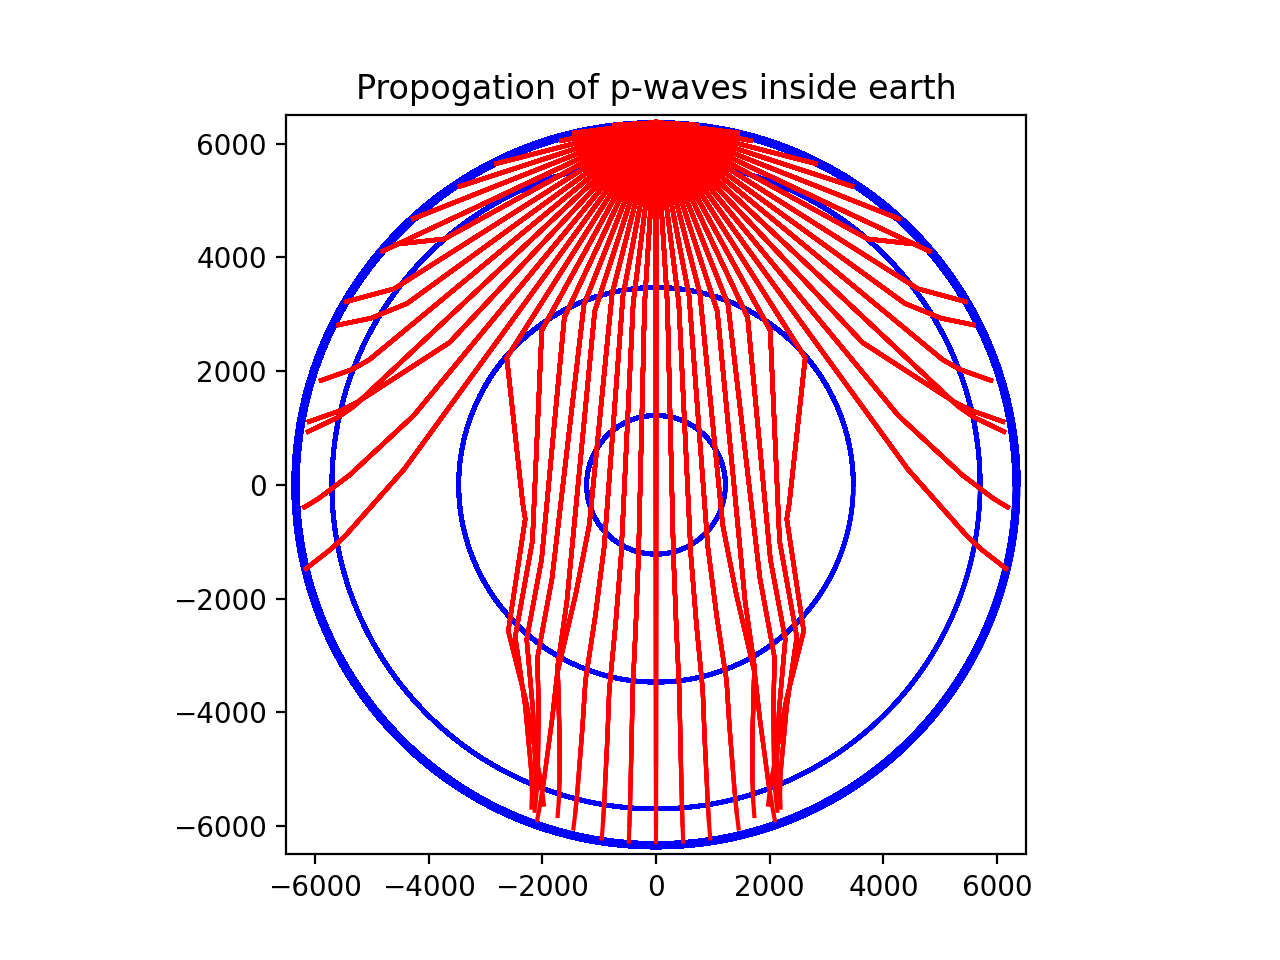

In [10]:
vel=vp
traj=[]
ltrm=[]
phival=np.arange(0,2*np.pi,np.pi/50)
for phiv in phival:
    trajectory = raydir(6370,np.pi/2,phiv)
    traj.append(np.array(trajectory))
    ltr=len(trajectory[0])
    ltrm.append(ltr)


fig = plt.figure()
ax = plt.axes(xlim=(-6500,6500), ylim=(-6500,6500))
ax.set_aspect('equal')
circ(6370-layers)
def animate(n):
    for k in range(len(phival)):
        x=traj[k][0][:n]
        y=traj[k][1][:n]
        ax.plot(x,y, color="red")

anim = FuncAnimation(fig,animate,frames=max(ltrm), interval=200)
#anim.save('test_trajectory_animation.gif')
plt.title("Propogation of p-waves inside earth")
plt.show()

C:\Users\Swapn\AppData\Local\Temp\ipykernel_3988\1180494597.py:31: RuntimeWarning: invalid value encountered in arcsin
  elif phi1>=abs(np.arcsin(vel[j]/vel[i])):


<IPython.core.display.Javascript object>


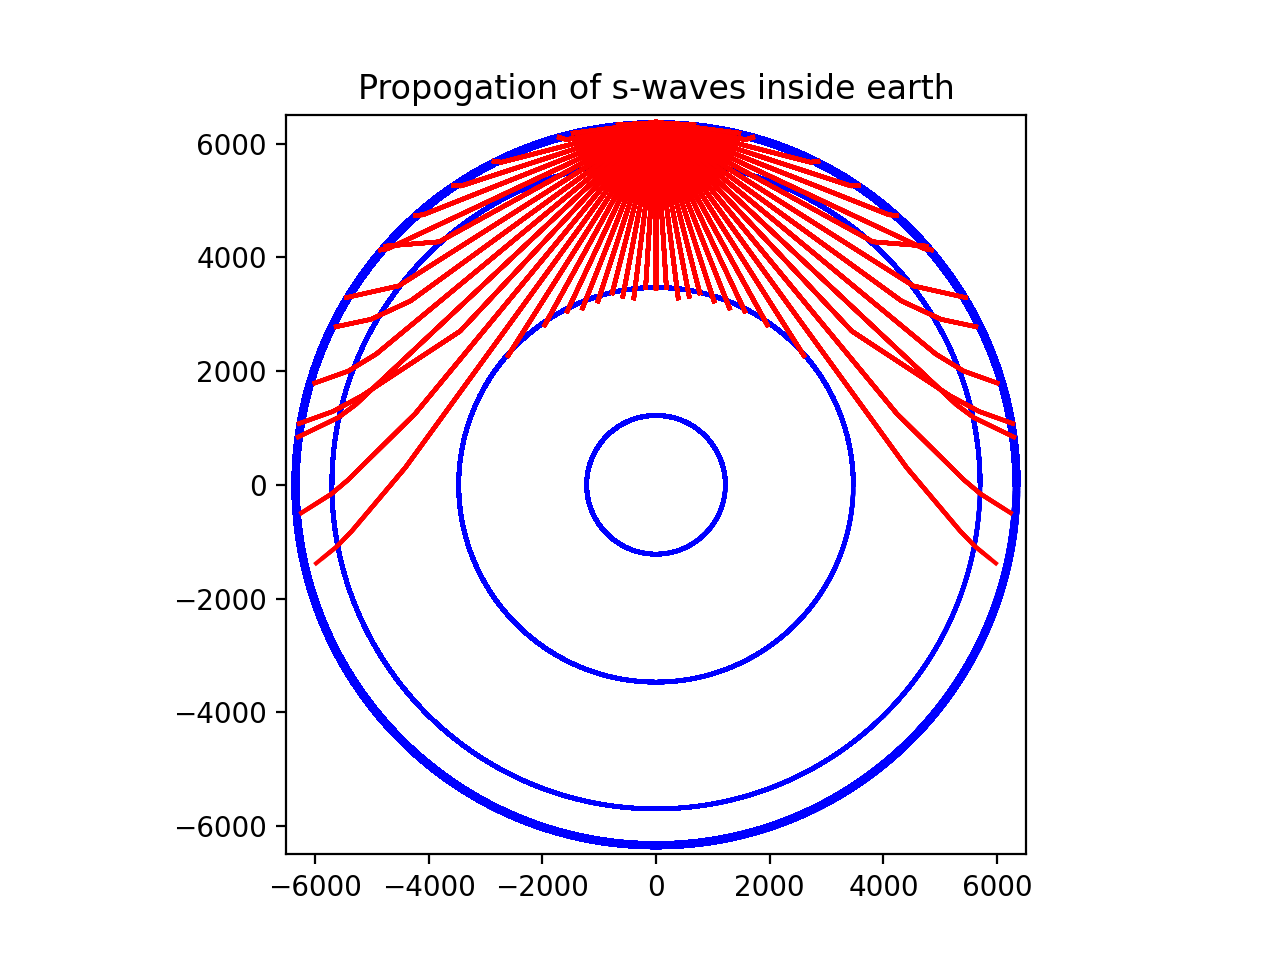

In [11]:
vel=vs
traj=[]
ltrm=[]
phival=np.arange(0,2*np.pi,np.pi/50)
for phiv in phival:
    trajectory = raydir(6370,np.pi/2,phiv)
    traj.append(np.array(trajectory))
    ltr=len(trajectory[0])
    ltrm.append(ltr)


fig = plt.figure(2)
ax = plt.axes(xlim=(-6500,6500), ylim=(-6500,6500))
ax.set_aspect('equal')
circ(6370-layers)
def animate(n):
    for k in range(len(phival)):
        x=traj[k][0][:n]
        y=traj[k][1][:n]
        ax.plot(x,y, color="red")

anim2 = FuncAnimation(fig,animate,frames=max(ltrm), interval=200)
#anim.save('test_trajectory_animation.gif')
plt.title("Propogation of s-waves inside earth")
plt.show()